# Word2vec evaluation metrics

This notebook presents results of an SGNS model trained on the RadioTalk corpus on some standard evaluation tasks. Note that the `data/` directory referred to here is (a symlink to a directory containing) a copy of the radio-talk S3 bucket.

More detail on the datasets used here for testing is in the `nlp-benchmarks` repo, including citations.

In [1]:
import os
import logging

import gensim as gs

import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
fmt = '%(asctime)s : %(module)s : %(levelname)s : %(message)s'
logging.basicConfig(format=fmt, level=logging.INFO)

In [3]:
# hide an irritating migration warning from smart_open
logging.captureWarnings(True)
logging.getLogger("py.warnings").setLevel(logging.CRITICAL)

In [4]:
os.chdir(os.path.expanduser('~/github/radiotalk/word2vec/'))

In [5]:
wv = gs.models.Word2Vec.load('data/word2vec/radiotalk.model').wv

2019-08-22 18:34:39,869 : utils : INFO : loading Word2Vec object from data/word2vec/radiotalk.model
2019-08-22 18:34:40,028 : utils : INFO : loading wv recursively from data/word2vec/radiotalk.model.wv.* with mmap=None
2019-08-22 18:34:40,029 : utils : INFO : loading vectors from data/word2vec/radiotalk.model.wv.vectors.npy with mmap=None
2019-08-22 18:34:40,054 : utils : INFO : setting ignored attribute vectors_norm to None
2019-08-22 18:34:40,056 : utils : INFO : loading vocabulary recursively from data/word2vec/radiotalk.model.vocabulary.* with mmap=None
2019-08-22 18:34:40,056 : utils : INFO : loading trainables recursively from data/word2vec/radiotalk.model.trainables.* with mmap=None
2019-08-22 18:34:40,057 : utils : INFO : loading syn1neg from data/word2vec/radiotalk.model.trainables.syn1neg.npy with mmap=None
2019-08-22 18:34:40,080 : utils : INFO : setting ignored attribute cum_table to None
2019-08-22 18:34:40,081 : utils : INFO : loaded data/word2vec/radiotalk.model


# Evaluate

## Analogy benchmarks

In [6]:
_ = wv.evaluate_word_analogies(analogies='nlp-benchmarks/analogy/google.txt', case_insensitive=True)

2019-08-22 18:34:40,233 : keyedvectors : INFO : Evaluating word analogies for top 300000 words in the model on nlp-benchmarks/analogy/google.txt
2019-08-22 18:34:40,234 : keyedvectors : INFO : precomputing L2-norms of word weight vectors
2019-08-22 18:34:42,023 : keyedvectors : INFO : capital-common-countries: 50.8% (257/506)
2019-08-22 18:34:48,272 : keyedvectors : INFO : capital-world: 28.0% (515/1842)
2019-08-22 18:34:48,880 : keyedvectors : INFO : currency: 3.9% (7/178)
2019-08-22 18:34:57,148 : keyedvectors : INFO : city-in-state: 47.6% (1175/2467)
2019-08-22 18:34:58,871 : keyedvectors : INFO : family: 61.5% (311/506)
2019-08-22 18:35:02,230 : keyedvectors : INFO : gram1-adjective-to-adverb: 7.5% (74/992)
2019-08-22 18:35:04,796 : keyedvectors : INFO : gram2-opposite: 31.9% (241/756)
2019-08-22 18:35:09,300 : keyedvectors : INFO : gram3-comparative: 59.9% (798/1332)
2019-08-22 18:35:12,873 : keyedvectors : INFO : gram4-superlative: 38.4% (405/1056)
2019-08-22 18:35:16,230 : keyed

In [7]:
_ = wv.evaluate_word_analogies(analogies='nlp-benchmarks/analogy/msr.txt', case_insensitive=True)

2019-08-22 18:35:33,628 : keyedvectors : INFO : Evaluating word analogies for top 300000 words in the model on nlp-benchmarks/analogy/msr.txt
2019-08-22 18:35:58,222 : keyedvectors : INFO : syntactic: 38.7% (2818/7288)
2019-08-22 18:35:58,223 : keyedvectors : INFO : Quadruplets with out-of-vocabulary words: 8.9%
2019-08-22 18:35:58,224 : keyedvectors : INFO : NB: analogies containing OOV words were skipped from evaluation! To change this behavior, use "dummy4unknown=True"
2019-08-22 18:35:58,224 : keyedvectors : INFO : Total accuracy: 38.7% (2818/7288)


## Word similarity benchmarks

In [8]:
_ = wv.evaluate_word_pairs(pairs='nlp-benchmarks/similarity/men.txt', delimiter=' ', case_insensitive=True)

2019-08-22 18:35:58,433 : keyedvectors : INFO : Skipping invalid line #3000 in nlp-benchmarks/similarity/men.txt
2019-08-22 18:35:58,436 : keyedvectors : INFO : Pearson correlation coefficient against nlp-benchmarks/similarity/men.txt: 0.6488
2019-08-22 18:35:58,436 : keyedvectors : INFO : Spearman rank-order correlation coefficient against nlp-benchmarks/similarity/men.txt: 0.6711
2019-08-22 18:35:58,437 : keyedvectors : INFO : Pairs with unknown words ratio: 1.7%


In [9]:
_ = wv.evaluate_word_pairs(pairs='nlp-benchmarks/similarity/rareword.txt', delimiter=' ', case_insensitive=True)

2019-08-22 18:35:58,526 : keyedvectors : INFO : Pearson correlation coefficient against nlp-benchmarks/similarity/rareword.txt: 0.4238
2019-08-22 18:35:58,526 : keyedvectors : INFO : Spearman rank-order correlation coefficient against nlp-benchmarks/similarity/rareword.txt: 0.4412
2019-08-22 18:35:58,527 : keyedvectors : INFO : Pairs with unknown words ratio: 59.0%


In [10]:
_ = wv.evaluate_word_pairs(pairs='nlp-benchmarks/similarity/rg65.txt', delimiter=' ', case_insensitive=True)

2019-08-22 18:35:58,644 : keyedvectors : INFO : Pearson correlation coefficient against nlp-benchmarks/similarity/rg65.txt: 0.5850
2019-08-22 18:35:58,645 : keyedvectors : INFO : Spearman rank-order correlation coefficient against nlp-benchmarks/similarity/rg65.txt: 0.5662
2019-08-22 18:35:58,646 : keyedvectors : INFO : Pairs with unknown words ratio: 3.1%


In [11]:
_ = wv.evaluate_word_pairs(pairs='nlp-benchmarks/similarity/simlex-slim.txt', delimiter=' ', case_insensitive=True)

2019-08-22 18:35:58,731 : keyedvectors : INFO : Pearson correlation coefficient against nlp-benchmarks/similarity/simlex-slim.txt: 0.2700
2019-08-22 18:35:58,732 : keyedvectors : INFO : Spearman rank-order correlation coefficient against nlp-benchmarks/similarity/simlex-slim.txt: 0.2749
2019-08-22 18:35:58,732 : keyedvectors : INFO : Pairs with unknown words ratio: 0.3%


In [12]:
_ = wv.evaluate_word_pairs(pairs='nlp-benchmarks/similarity/wordsim353.txt', delimiter=' ', case_insensitive=True)

2019-08-22 18:35:58,857 : keyedvectors : INFO : Pearson correlation coefficient against nlp-benchmarks/similarity/wordsim353.txt: 0.5641
2019-08-22 18:35:58,858 : keyedvectors : INFO : Spearman rank-order correlation coefficient against nlp-benchmarks/similarity/wordsim353.txt: 0.6268
2019-08-22 18:35:58,858 : keyedvectors : INFO : Pairs with unknown words ratio: 0.6%


# Visualize top words' relationships

Quick and dirty, just to get a sense of clustering and the degree of anisotropy.

## Pick the words to visualize

In [13]:
threshold=5e5

sw = stopwords.words('english')
sw += ["there's", "they're", "going", "would", "that's", "he's", "oh", "um", "uh"]

vocab = {w : wv.vocab[w].count for w in wv.vocab}

labels = []
for word in wv.vocab:
    if word in sw:
        continue

    if wv.vocab[word].count < threshold:
        continue

    labels.append(word)

## K-means clustering

In [14]:
n_clusters = 10
km = KMeans(n_clusters = n_clusters)
km.fit(wv[labels])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
cluster_labels = km.labels_
cluster_centroids = km.cluster_centers_
 
print("Score (sum of distances to cluster centroids):")
print(km.score(wv[labels]))
 
print("Silhouette_score: ")
print(silhouette_score(wv[labels], cluster_labels, metric='euclidean'))

Score (sum of distances to cluster centroids):
-3596.954
Silhouette_score: 
0.005270136


In [16]:
for i in range(n_clusters):
    print("Cluster " + str(i) + ": " + str([w for w, c in zip(labels, km.labels_) if c == i]) + '\n')

Cluster 0: ['back', 'get', "we'll", 'phone', 'want', 'talk', 'give', 'open', 'see', 'stop', 'need', 'go', 'play', 'take', 'listen', 'coming', 'find', 'let', 'make', 'run', 'stay', 'put', 'help', 'use', 'pay', 'insurance', 'live', 'save', 'check', 'call', 'break', 'tell', 'try', 'keep', 'hear', 'bring', 'watch', 'come', 'credit', 'wait', 'leave', 'start', 'read', 'buy', 'ask', 'continue', "i'll", 'move']

Cluster 1: ['best', 'good', 'bad', 'better', 'big', 'great']

Cluster 2: ['road', 'radio', 'home', 'university', 'florida', 'county', 'local', 'across', 'services', 'street', 'group', 'center', 'area', 'community', 'city', 'sports', 'weather', 'coast', 'west', 'traffic', 'service', 'south', 'town', 'college', 'station']

Cluster 3: ['system', 'white', 'new', 'working', 'john', 'top', 'business', 'country', 'world', 'companies', 'law', 'line', 'program', 'school', 'state', 'office', 'company', 'human', 'air', 'order', 'including', 'us', 'national', 'court', 'california', 'federal', 'gen

## T-SNE viz

In [17]:
def tsne_plot(wvecs, labels):
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    tsne_vals = tsne_model.fit_transform(wvecs[labels])

    x = [v[0] for v in tsne_vals]
    y = [v[1] for v in tsne_vals]

    fig, ax = plt.subplots(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.plot(x[i], y[i], marker='o', label=km.labels_)
        
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        
    plt.show()

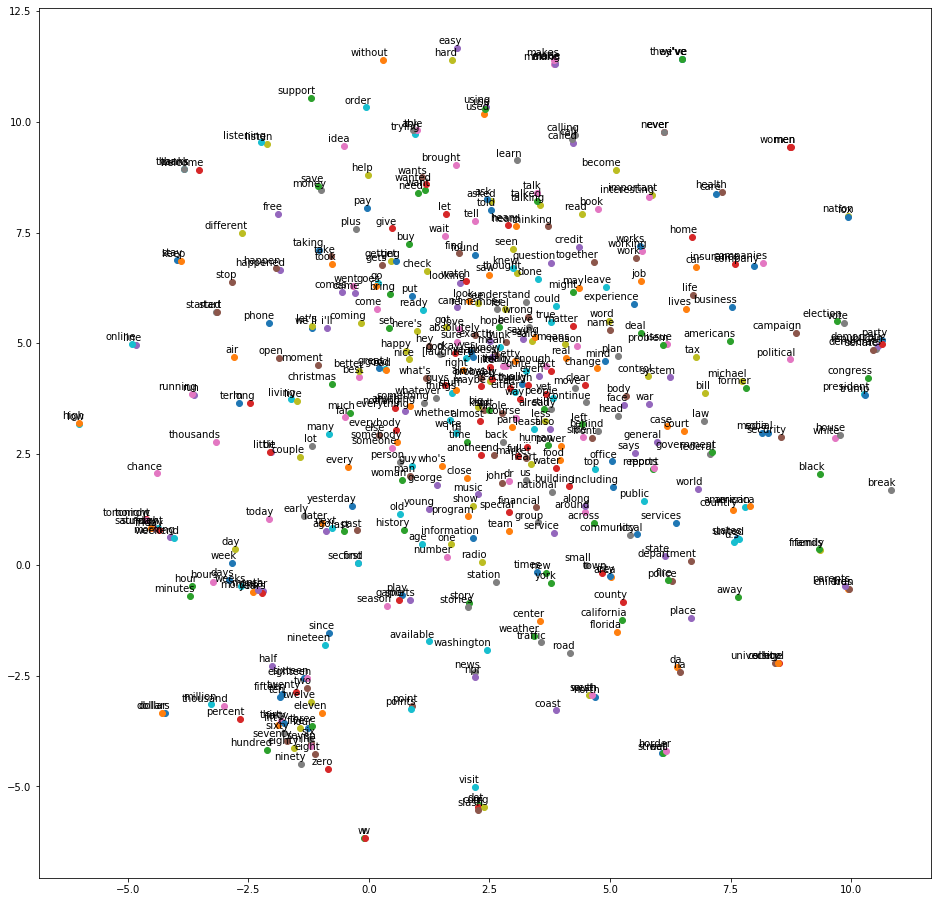

In [18]:
tsne_plot(wv, labels)